<a href="https://colab.research.google.com/github/yajuna/computer-assisted-calculus/blob/master/week5_5_more_integrals_and_other_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, we look at some integrals that look strange.

We will look at these integrals by looking at their Riemann sums.

## In class portion- please submit this portion before end of class.

Cells after "Python lab" portion should be completed after class and submitted when done.

In [38]:
import numpy as np
import matplotlib.pyplot as plt

import datetime
now = datetime.datetime.now()

# print versions of softwares and time when run
import sys
print("Python 3 version is", sys.version)
print("Numpy version is", np.__version__)
import matplotlib
print("Matplotlib version is", matplotlib.__version__)
print("Code run at", now)

Python 3 version is 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Numpy version is 2.0.2
Matplotlib version is 3.10.0
Code run at 2025-10-30 05:10:36.600233


We can look at integrals that are defined on an infinite range of $x$. An example is area under the curve $y(x)=\frac{1}{x^2+1}$, from $x=0$ to $x\to\infty$.

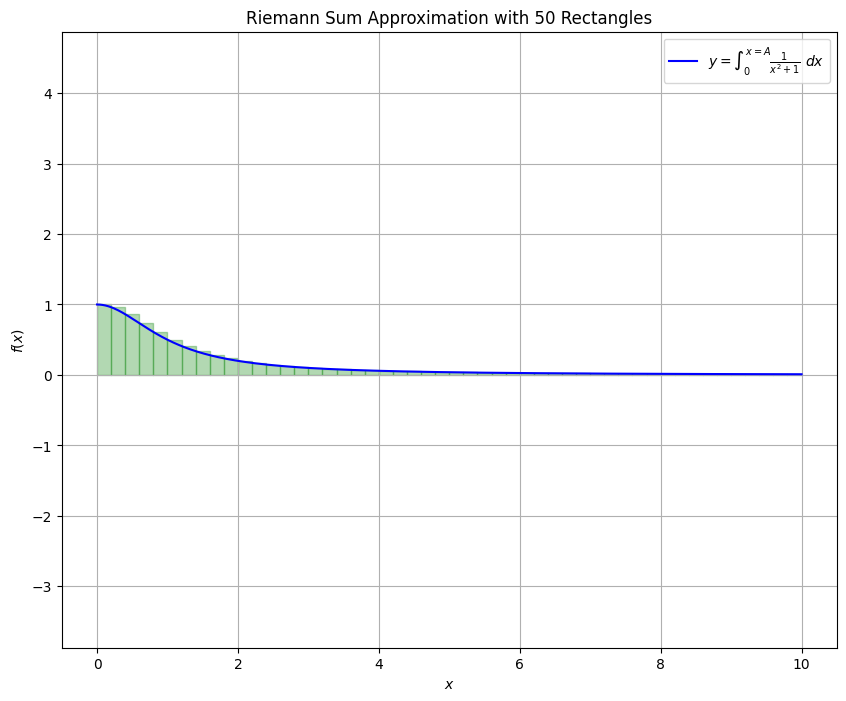

In [39]:
def f(x):
    return 1/(1 + x**2)

a = 0
b = 10
x_values = np.linspace(a, b, 500)
y_values = f(x_values)

num_rects = int((b-a)*5)
x_rects = np.linspace(a, b, num_rects + 1)
# print(x_rects)
dx = (x_rects[-1] - x_rects[0]) / num_rects
# print(dx)
y_rects = f(x_rects)

plt.figure(figsize=(10, 8))
plt.plot(x_values, y_values, label=r'$y = \int^{x=A}_0\frac{1}{x^2+1}\ dx$', color='b')

for i in range(num_rects):
    plt.fill_between([x_rects[i], x_rects[i] + dx], [y_rects[i], y_rects[i]], alpha=0.3, color='green')

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r'Riemann Sum Approximation with '+str(num_rects)+ ' Rectangles')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

We compute the approximate area by adding the area of the rectangles.

In [40]:
area_inf = np.sum(y_rects * dx) - y_rects[-1] * dx

print(area_inf)

print(b, np.arctan(b))

1.5701310404941677
10 1.4711276743037347


### Exercise: Make up your own function and plot its Riemann sum from 0 to $\infty$. Does it look like the integral is finite or infinity?

We can look at integrals that are defined on a finite range of $x$ but the point is not defined at a value of $x$. An example is area under the curve $y(x)=\frac{1}{\sqrt{x}}$, from $x=\epsilon$ to $x=1$.

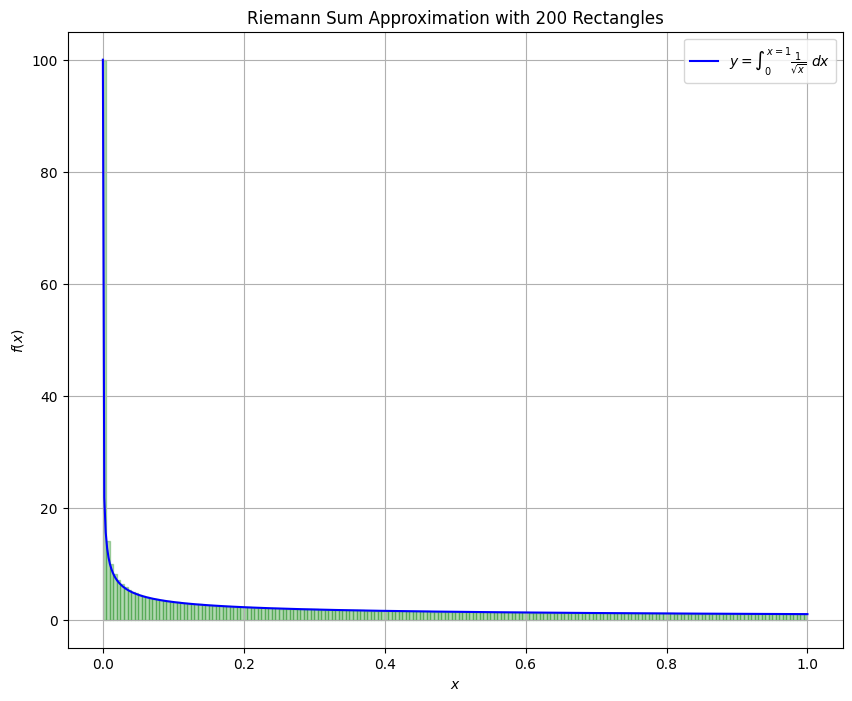

In [41]:
def f(x):
    return 1/np.sqrt(x)

a = 0.0001
b = 1
x_values = np.linspace(a, b, 500)
y_values = f(x_values)

num_rects = 200
x_rects = np.linspace(a, b, num_rects + 1)
# print(x_rects)
dx = (x_rects[-1] - x_rects[0]) / num_rects
# print(dx)
y_rects = f(x_rects)

plt.figure(figsize=(10, 8))
plt.plot(x_values, y_values, label=r'$y = \int^{x=1}_0\frac{1}{\sqrt{x}}\ dx$', color='b')

for i in range(num_rects):
    plt.fill_between([x_rects[i], x_rects[i] + dx], [y_rects[i], y_rects[i]], alpha=0.3, color='green')

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r'Riemann Sum Approximation with '+str(num_rects)+ ' Rectangles')
plt.legend()
# plt.axis('equal')
plt.grid(True)
plt.show()

Compute the definite integral

In [42]:
area_epsilon = np.sum(y_rects * dx) - y_rects[0] * dx

# test with left end point Riemann sum too by - y_rects[0] * dx

print(area_epsilon)

print(a, 2 - 2 * np.sqrt(a))

1.897407928234676
0.0001 1.98


Exercise: try to find a function with a vertical asymptote and compute the area under the curve near the asymptote.

The function below is called the Thomae's function. It has several other names- such as popcorn function, and raindrop function. You can find more information [here](https://en.wikipedia.org/wiki/Thomae%27s_function)

Roughly speaking, the function $f(x)$ is equal to zero if $x$ is irrational (such as $\sqrt{2}$, or $\pi$), and $f(x)=1/q$, if $x=p/q$.

The integral of the popcorn function is zero on any interval.

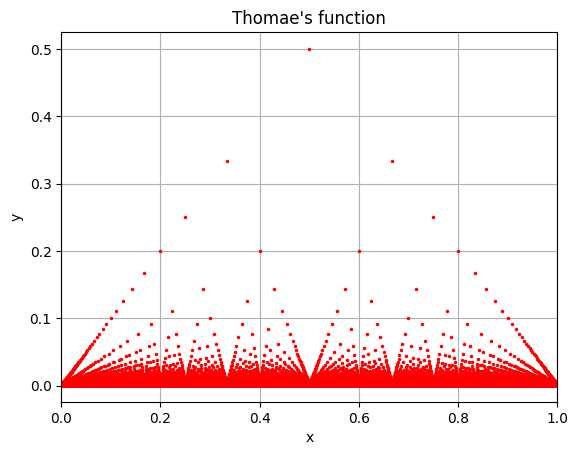

Found 303791 points above y=0.001
Found 3003 points above y=0.01
Found 27 points above y=0.1


In [43]:
xlist = []
ylist = []
for q in range(2,1000):
    for p in range(1,q):
        if np.gcd(p,q) == 1:
            xlist.append(p/q)
            ylist.append(1/q)

plt.plot(xlist, ylist, '.r', ms=3)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,1)
plt.grid('on')
plt.title("Thomae's function")
plt.show()
lim = 0.001
num = sum(y > lim for y in ylist)
print(f'Found {num} points above y={lim}')
lim = 0.01
num = sum(y > lim for y in ylist)
print(f'Found {num} points above y={lim}')
lim = 0.1
num = sum(y > lim for y in ylist)
print(f'Found {num} points above y={lim}')

A similar function is called the Dirichlet function. It is defined to be $f(x)=1$ for $x$ being rational, and $f(x)=0$ when $x$ is irrational.

Dirichlet function is not Riemann integrable (but its Lesbesgue integral is zero- you will see this when you take graduate level math courses).

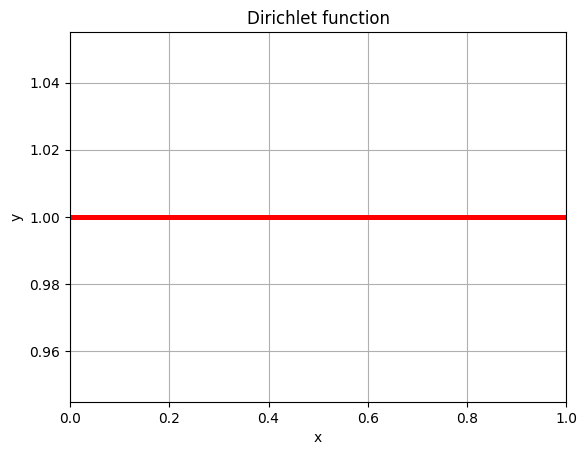

In [44]:
xlist = []
ylist = []
for q in range(2,1000):
    for p in range(1,q):
        if np.gcd(p,q) == 1:
            xlist.append(p/q)
            ylist.append(1)

plt.plot(xlist, ylist, '.r', ms=3)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,1)
plt.grid('on')
plt.title("Dirichlet function")
plt.show()

This is another strange function; the Weierstrass function. It is defined to be

$f(x)=\sum^{\infty}_{n=0}a^n\cos(b^n\pi x)$, with $0<a<1$, $b$ is an odd positive integer, and $ab>1+\frac{3}{2}\pi$.

In the example below, we take $a=1/2$, and $b=3$.

This function is continuous everywhere, but not differentiable anywhere. It is also one of the first fractal studied.

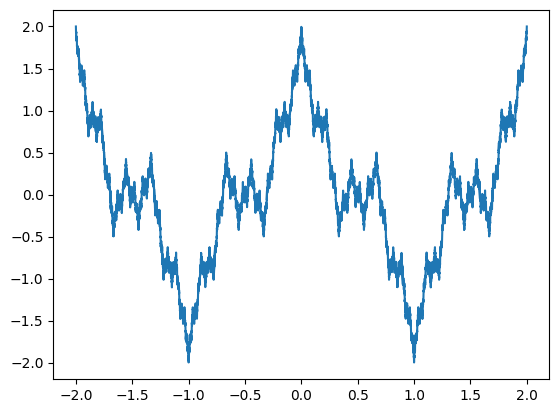

In [45]:
# MyVar: terms added; the higher the more detailed
MyVar = 100000

# left and right range of x variable
startx = -2
stopx = 2
x = np.linspace(startx, stopx, MyVar)

# defining the function.  b=3 and a=1/2
def weierstrass(x, Nvar):
    we = np.zeros(MyVar)
    for n in range(0, Nvar):
        we = we + np.cos(3**n * np.pi * x)/2**n
    return we

# play with Nvar
plt.plot(x, weierstrass(x, 500))

# make the range narrow and enjoy the fractal structure of your plot
plt.show()